# Set Up library

First, we import some few library for malipulate and visualize the data of house sale in King county, Seattle 

In [1]:
# Import library we need to use
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Get data and malipulate

In [2]:
# Read data to dataframe from file kc_house_data.csv to the dataframe
data = pd.read_csv(r"C:\Users\Admin\Data python\kc_house_data.csv")

We make a copy and do some stuff in this file in order not to change anything on the orginal

In [3]:
# We copy data from the orginal data
house_sale = data.copy()

Let take a look at some row of the data

In [4]:
house_sale.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Here is explain for each feature in data

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [5]:
# Let check if there is any null value in the data set

house_sale.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
# Take a look at the each column and their data type

house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We change data type of date to the day-month-year-hour-min

In [7]:
house_sale["date"] = house_sale["date"].apply(pd.to_datetime)

I see sqft_lot15, sqft_living15, id, zipcode not important when we consider the house price which is our target so i remove those column.

In [8]:
col_drop = ["sqft_lot15", "sqft_living15", "id", "zipcode"]

house_sale.drop(col_drop, inplace = True, axis =1) 

Let glance at yr_renovated column value to know excatly about this column value and it distribution

In [9]:
house_sale["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
house_sale.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258     47.560053   
std      828.090978     442.575043     29.373411    401.679240      0.138564   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.471000   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571800   
75%     2210.000000     560.000000   1997.000000      0.000000     47.678000   
max     9410.000000    4820.000000   2015.000000   2015.000000     47.777600   

               long  
count  21613.000000  
mean    -122.213896  
std        0.140828  
min     -122.519000  
25%     -122.328000  
50%     -122.230000  
75%     -122.125000  
max     -121.315000

There too many value to handle and time from year which house was renovated to the time house was sold was not too meaninfull to the price of house so change the value to 0, 1 like OneHotEncoding (1 for house was renovated, 0 for house wasn't renovated). May be i will try different strategy that split value to categorical Encoding like Embedding and Encoding with Embedding


In [11]:
house_sale["yr_renovated"] = (house_sale["yr_renovated"] > 0).astype(int)

Let explore the outlier in house sale price by visualize data with boxplot and histogram plot.

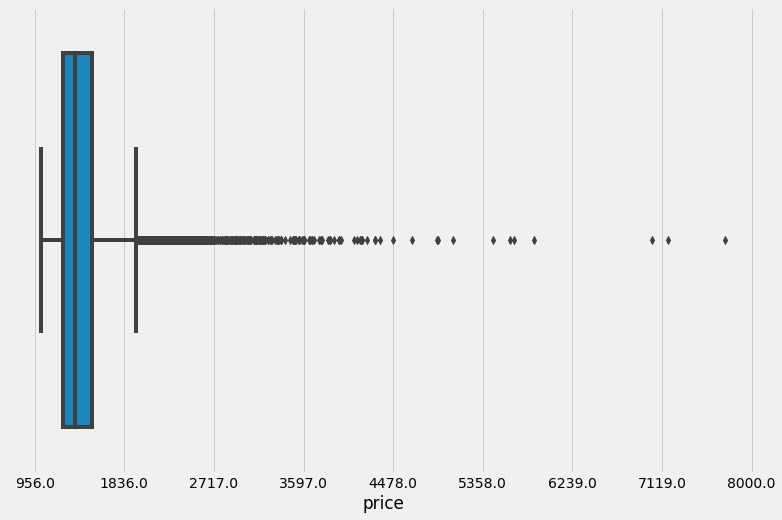

In [12]:
price = house_sale["price"]
xtick_value = np.linspace(price.min(), 8000000, 10)

with plt.style.context("fivethirtyeight"):
    plt.subplots(figsize = (12, 8))
    ax = sns.boxplot(x=house_sale["price"])
    ax.set_xticklabels(round(v/1000) for v in xtick_value)

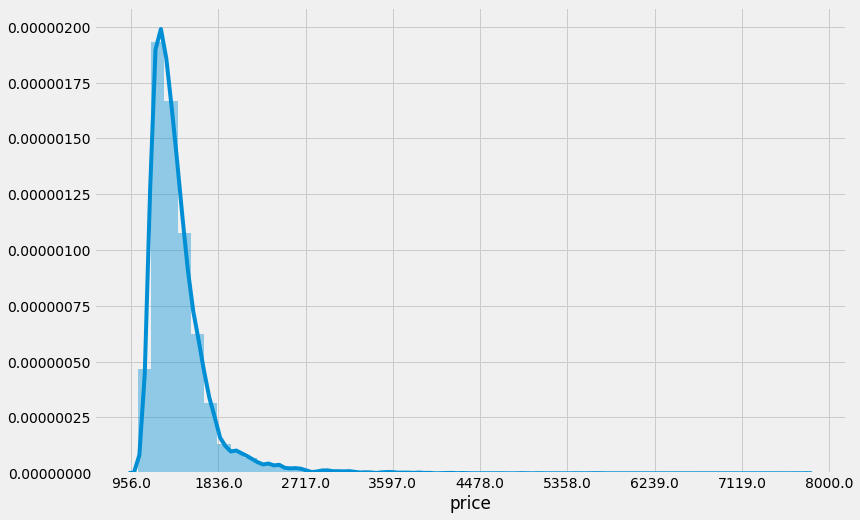

In [13]:
with plt.style.context("fivethirtyeight"):
    plt.subplots(figsize = (12, 8))
    ax = sns.distplot(a = house_sale["price"])
    ax.set_xticklabels(round(v/1000) for v in xtick_value)

We can see that outlier price is more than 2700k, I will remove sample with price more than 2700k 

In [16]:
row_drop = house_sale[house_sale["price"] > 2700000].index

house_sale.drop(row_drop, inplace = True)

house_sale.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.154000e+04  21540.000000  21540.000000  21540.000000  2.154000e+04   
mean   5.299817e+05      3.366852      2.107509   2067.111792  1.508008e+04   
std    3.188170e+05      0.927151      0.758190    887.924188  4.147850e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.200000e+05      3.000000      1.500000   1420.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.600500e+03   
75%    6.400000e+05      4.000000      2.500000   2540.000000  1.062300e+04   
max    2.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21540.000000  21540.000000  21540.000000  21540.000000  21540.000000   
mean       1.492897      0.006407      0.227159      3.409099      7.644615   
std        0.539533      0.079787      0.750984      0.650528      1.156947   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21540.000000   21540.000000  21540.000000  21540.000000  21540.000000   
mean    1778.954643     288.157149   1970.979155      0.041922     47.559837   
std      809.295849     435.731561     29.352661      0.200416      0.138722   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.470200   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571400   
75%     2200.000000     560.000000   1997.000000      0.000000     47.678100   
max     9410.000000    4130.000000   2015.000000      1.000000     47.777600   

               long  
count  21540.000000  
mean    -122.213804  
std        0.140989  
min     -122.519000  
25%     -122.328000  
50%     -122.231000  
75%     -122.125000  
max     -121.315000

# Discover and visualize the data to gain insights

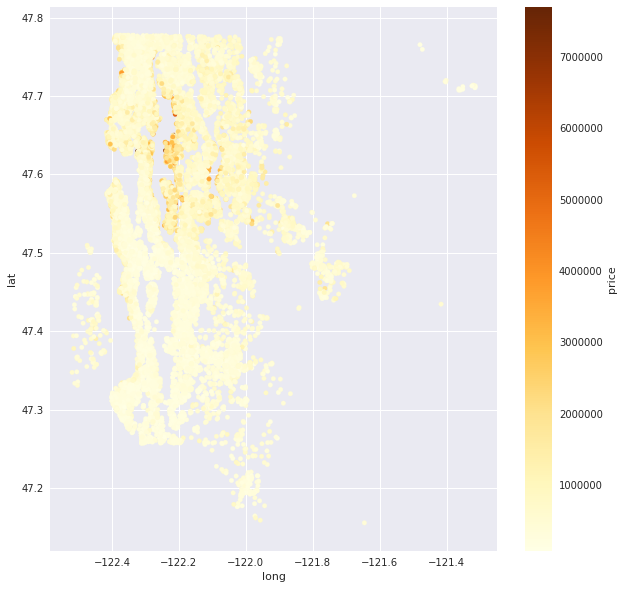

In [12]:
# Draw scatter mapping with x is longtitute of house, y is latitute of house and colorbar to show price each house.

from mpl_toolkits.basemap import Basemap

with plt.style.context("seaborn"):
    fig, ax = plt.subplots(figsize = (10,10))
    house_sale.plot(kind="scatter", x = 'long', y = 'lat', 
    ax = ax, c="price", cmap='YlOrBr', colorbar=True)

In [12]:
# Save object to draw scatter on base map background
lat = house_sale["lat"].values
long = house_sale["long"].values
price = house_sale["price"].values

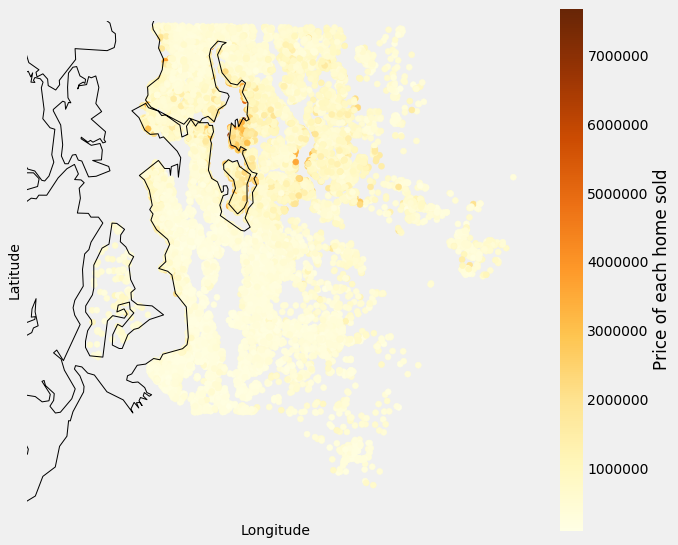

In [14]:
# Visualize data with map in background to see distribution of house in King County

with plt.style.context("fivethirtyeight"):
    fig = plt.figure(figsize = (10,9))
    m = Basemap(projection='cass', lat_0 = 47.45, lon_0 =-122.15, width = 75000, height = 75000, resolution="h")
    m.scatter(x = long, y = lat, c = price, cmap = 'YlOrBr', latlon = True)
    m.drawcoastlines()
    plt.colorbar(label = 'Price of each home sold')
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)

You can see that most expensive house was around close to Lake Washington or next to Mediana bay, maybe house have view to lake related to the price which we can add feature if house was closed to the lake, Medina Bay.

# Looking for correlations

Let see the correlation between price each house and other feature

In [15]:
# Set correlation matrix of data
cor_matrix = house_sale.corr()

# Caculate correlation of each attribute to price
cor_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126092
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

We can see that sqft_living, grade, sqft_above has strong correlation with price of each house. To see cleary about correlation between this attribute we can plot scatter matrix

We can consider age of house if it affect to the price of each house. We caculate new attribute by take the date which house was sale minus the year that house was built.

In [16]:
house_sale['Age'] = pd.DatetimeIndex(house_sale['date']).year - house_sale['yr_built']

Now take a look at data one again with new attribute

In [17]:
house_sale.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136      0.042289     47.560053   
std      828.090978     442.575043     29.373411      0.201253      0.138564   
min      290.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.471000   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571800   
75%     2210.000000     560.000000   1997.000000      0.000000     47.678000   
max     9410.000000    4820.000000   2015.000000      1.000000     47.777600   

               long           Age  
count  21613.000000  21613.000000  
mean    -122.213896     43.317818  
std        0.140828     29.375493  
min     -122.519000     -1.000000  
25%     -122.328000     18.000000  
50%     -122.230000     40.000000  
75%     -122.125000     63.000000  
max     -121.315000    115.000000

We can see that min of age is -1, this is maybe because miss type betwwen it build and the year it was sold. So, I decide to remove this row

In [18]:
house_sale.drop(house_sale[house_sale['Age'] == -1].index, inplace = True, axis = 0)

Take a look at data correlation again

In [19]:
cor_matrix["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126092
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

# Prepare the data for Machine Learning algorithms

In [20]:
# Remove attribute that not important to the price of house

house_sale.drop(['yr_built', "date"], inplace = True, axis = 1)

In [21]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21601 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21601 non-null  float64
 1   bedrooms       21601 non-null  int64  
 2   bathrooms      21601 non-null  float64
 3   sqft_living    21601 non-null  int64  
 4   sqft_lot       21601 non-null  int64  
 5   floors         21601 non-null  float64
 6   waterfront     21601 non-null  int64  
 7   view           21601 non-null  int64  
 8   condition      21601 non-null  int64  
 9   grade          21601 non-null  int64  
 10  sqft_above     21601 non-null  int64  
 11  sqft_basement  21601 non-null  int64  
 12  yr_renovated   21601 non-null  int32  
 13  lat            21601 non-null  float64
 14  long           21601 non-null  float64
 15  Age            21601 non-null  int64  
dtypes: float64(5), int32(1), int64(10)
memory usage: 2.7 MB


For trainning machine learning better we should split data into 2 part which is train data and test data. Because if our model never see test data, we can evaluate exactly model precision on them.

In [22]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(house_sale, test_size = 0.2, random_state = 42)

Take a copy of housing_train_set not to collapse the orginal trainning data

In [23]:
housing_train_notscale = housing_train.drop("price", axis = 1)
housing_train_label = housing_train['price'].copy()

We always have to scale data to the same scale, because algorithm always not prefer diffirent scale, it will preform poorly.
I use standardization or we can use another scale like min-max scaling  

In [24]:
from sklearn.preprocessing import StandardScaler

housing_train_prepared = StandardScaler().fit_transform(housing_train_notscale)

# Select and train a model 

We will train through some model with default hyper parametter to determine which model suit for our data and then we will fine tune it to make it better

We define a function to evaluate mean squared of predict label and original label to evaluate precison of model. For better evaluation, we use cross_val_score which we split trainning data to 10 parts (e.i cv = 10), this valuation take 9 folds (i.e trainning set) to trainning and evaluate on the other fold (i.e validation set).

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def EvaluateModel(model, x_train = housing_train_prepared, x_label = housing_train_label, kfold = 5):
    scores = cross_val_score(model, x_train, x_label, cv = kfold, scoring = "neg_mean_squared_error")
    final_score = np.sqrt(-scores)
    print("Scores:", final_score)
    print("Mean:", np.mean(final_score))
    print("Standard deviation:", np.std(final_score))

We assume that data is a linear regression (i.e high bias model) so let train the data with this model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

EvaluateModel(lin_reg)

The mean squared error bettween predict value and true label is around 200k +- 12k which mean of price is about 500K and price range from 300k - 600k. This is call underfit model which mean model doesn't perform well on this model. Solution is use more complexity model

Let try stochastic gradient decent which model with better optimization of linear regression

In [ ]:
from sklearn.linear_model import SGDRegressor

SGD_reg = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.1, n_iter_no_change = 5, early_stopping = True)

EvaluateModel(SGD_reg)

The defaul value of SGD wasn't better than normal linear model let move to more complexity model

In [ ]:
# This is Support Vector Machine with Gaussian RFB kennel is the defaul hyperparametter
from sklearn.svm import SVR

SVM_reg = SVR()

EvaluateModel(SVM_reg)

We see that this model perform worse than the linear model it mean that model is overfiting data. Solution is use model less complexity or feed them more data.

In [ ]:
# Try model with Decision Tree model

from sklearn.tree import DecisionTreeRegressor

Decisiontree_reg = DecisionTreeRegressor()

EvaluateModel(Decisiontree_reg)

We notice this model is slightly better than linear model which still not what i expect

# Modeling with ensemble Model

This model will use each result of small model then aggregate them to caculate new prediction which it is better than only one model result

Try random forest which is aggrerate of decision tree with number of tree if 100 by default

In [26]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor()

EvaluateModel(RandomForest_reg)

Scores: [127600.83715629 138862.358068   123930.70449932 142964.48442312
 138862.47741643]
Mean: 134444.17231263238
Standard deviation: 7334.872123531451


It is much better than above model, we will try to find better hyperparameter for bettering score

Let try other ensembel model lke AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

Ada_reg = AdaBoostRegressor(Decisiontree_reg, learning_rate = 0.1, n_estimators = 100)

EvaluateModel(Ada_reg)

Not even better than Random Forest but consider this model and optimizer it

Try Gradient Boosting model

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

GraBoost_reg = GradientBoostingRegressor()

EvaluateModel(GraBoost_reg)

Scores: [133908.24997918 146752.28436711 134997.65289121 144470.1684215
 140724.74091643]
Mean: 140170.61931508858
Standard deviation: 5061.389916741649


Slightly worse than Random forest and Gradient Boosting but we still consider to fine tune it on next section

# Fine Tune Model

We will try to use Random Search for several hyperparametter to optimize model for better fitting

Try to find hyperparameter for random forest with GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    'n_estimators': [140, 150, 170], 'max_features' : [13], 'max_leaf_nodes': [2000], 
    "max_depth": [20],'min_samples_leaf': [10], 'random_state': [42], "min_samples_split": [13]
}

randomforest_rds = GridSearchCV(RandomForest_reg, param_grid = param_dist, cv = 10, scoring = "neg_mean_squared_error")

randomforest_rds.fit(housing_train_prepared, housing_train_label)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [34]:
rscvs = randomforest_rds.cv_results_

for mean_score, params in zip(rscvs["mean_test_score"], rscvs["params"]):
    print(np.sqrt(-mean_score), params)

141312.97500704447 {'max_depth': 20, 'max_features': 13, 'max_leaf_nodes': 2000, 'min_samples_leaf': 10, 'min_samples_split': 13, 'n_estimators': 140, 'random_state': 42}
141304.00832235027 {'max_depth': 20, 'max_features': 13, 'max_leaf_nodes': 2000, 'min_samples_leaf': 10, 'min_samples_split': 13, 'n_estimators': 150, 'random_state': 42}
141443.71080010678 {'max_depth': 20, 'max_features': 13, 'max_leaf_nodes': 2000, 'min_samples_leaf': 10, 'min_samples_split': 13, 'n_estimators': 170, 'random_state': 42}


The result haven't better than the the random forest default we should change to another model

Try gradient boosting, I manually set the hyperparametter many time and find more optimal solution

In [28]:
GraBoost_reg = GradientBoostingRegressor(max_features = 12, max_leaf_nodes = 700, 
    max_depth = 20, min_samples_leaf = 14, random_state = 42, min_samples_split = 20, n_estimators = 105)

EvaluateModel(GraBoost_reg)

Scores: [117525.04890597 133964.54820213 123559.9945745  134911.05685934
 137865.63265249]
Mean: 129565.25623888752
Standard deviation: 7718.255799549095


In [ ]:
The result is slightly better than the randomforest default

In [ ]:
Decisiontree_reg = DecisionTreeRegressor(max_features = 12, max_leaf_nodes = 700, 
    max_depth = 12, min_samples_leaf = 8, random_state = 42, min_samples_split = 10)

Ada_reg = AdaBoostRegressor(Decisiontree_reg, learning_rate = 0.01, n_estimators = 170)

EvaluateModel(Ada_reg)

def EvaluateModelNoFold(model):
    fitting = model.fit(housing_train_prepared,housing_train_label)
    prediction = fitting.predict(housing_train_prepared)
    mse = np.sqrt(mean_squared_error(prediction, housing_train_label))
    print("score:", mse)

For more optimal solution of Gradient boosting, I try RandomizedSearchCV with continuos distribution hyperparameter

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

param_dist = {
    'n_estimators': list(range(100, 140)), 'max_features' : list(range(8, 14)), 'max_leaf_nodes': list(range(500, 1000)), 
    "max_depth": list(range(5, 15)), 'min_samples_leaf': list(range(7, 15)), 'random_state': [42], 
    "min_samples_split": list(range(10, 18)), 'learning_rate': reciprocal(0.01, 0.3), 'n_iter_no_change': [5]
}

Graboost_reg = RandomizedSearchCV(
    GraBoost_reg, param_distributions = param_dist, cv = 8, 
    scoring = "neg_mean_squared_error", verbose = 2, n_iter = 50, random_state = 42
)

Graboost_reg.fit(housing_train_prepared, housing_train_label)

4.4s
[CV] learning_rate=0.05215673502035946, max_depth=7, max_features=12, max_leaf_nodes=668, min_samples_leaf=10, min_samples_split=10, n_estimators=103, n_iter_no_change=5, random_state=42 
[CV]  learning_rate=0.05215673502035946, max_depth=7, max_features=12, max_leaf_nodes=668, min_samples_leaf=10, min_samples_split=10, n_estimators=103, n_iter_no_change=5, random_state=42, total=   4.7s
[CV] learning_rate=0.05215673502035946, max_depth=7, max_features=12, max_leaf_nodes=668, min_samples_leaf=10, min_samples_split=10, n_estimators=103, n_iter_no_change=5, random_state=42 
[CV]  learning_rate=0.05215673502035946, max_depth=7, max_features=12, max_leaf_nodes=668, min_samples_leaf=10, min_samples_split=10, n_estimators=103, n_iter_no_change=5, random_state=42, total=   5.0s
[CV] learning_rate=0.05215673502035946, max_depth=7, max_features=12, max_leaf_nodes=668, min_samples_leaf=10, min_samples_split=10, n_estimators=103, n_iter_no_change=5, random_state=42 
[CV]  learning_rate=0.052

RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=20,
                                                       max_features=12,
                                                       max_leaf_nodes=700,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=14,
                                                       min_samples_split=20,
                                                       min_weight_fraction_leaf=0.0,
                             

In [30]:
rscvs = Graboost_reg.cv_results_

for mean_score, params in zip(rscvs["mean_test_score"], rscvs["params"]):
    print(np.sqrt(-mean_score), params)

125169.62324174593 {'learning_rate': 0.03574712922600243, 'max_depth': 12, 'max_features': 12, 'max_leaf_nodes': 520, 'min_samples_leaf': 13, 'min_samples_split': 11, 'n_estimators': 118, 'n_iter_no_change': 5, 'random_state': 42}
157160.7286372719 {'learning_rate': 0.014049959523783897, 'max_depth': 12, 'max_features': 12, 'max_leaf_nodes': 599, 'min_samples_leaf': 14, 'min_samples_split': 17, 'n_estimators': 102, 'n_iter_no_change': 5, 'random_state': 42}
178876.5328278216 {'learning_rate': 0.010725209743171996, 'max_depth': 6, 'max_features': 11, 'max_leaf_nodes': 913, 'min_samples_leaf': 12, 'min_samples_split': 11, 'n_estimators': 120, 'n_iter_no_change': 5, 'random_state': 42}
125986.37929088589 {'learning_rate': 0.08167611317882541, 'max_depth': 14, 'max_features': 13, 'max_leaf_nodes': 752, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 126, 'n_iter_no_change': 5, 'random_state': 42}
125403.07972267688 {'learning_rate': 0.08012737503998539, 'max_depth': 14, 'm

Let caculate MSE and take the best param of RandomizedSearchCV

In [31]:
negative_mse = Graboost_reg.best_score_
rmse = np.sqrt(-negative_mse)
rmse

124394.33822836606

The result is much better but not what i expect, I want decrease the MSE down at about approximately 100k 

In [32]:
Graboost_reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.047245115775157095,
                          loss='ls', max_depth=8, max_features=13,
                          max_leaf_nodes=945, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=9,
                          min_samples_split=17, min_weight_fraction_leaf=0.0,
                          n_estimators=127, n_iter_no_change=5,
                          presort='deprecated', random_state=42, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)